In [0]:
""" Solving the Linear Regression using Least Square Method"""
""" f(x_i ) = b + m(x_i)"""
""" Y = XA + E ; Y = label, X = [x_i] , A = [b, m] E = [e_i] A can be solved as A = (inv(X.T * X))*(X.T *Y)"""


class linear_regression_lsm:
    def __init__(self, feature, label):
        import numpy as np
        self.X = np.expand_dims(feature, axis=0)
        self.Y = label
        self.n = len(feature)
        self.b = np.random.rand(1, 1)  # initiaizing intercept
        self.m = np.random.rand(len(feature[0]), 1)  # coefficients or slopes
        self.s = len(feature[0])
        self.l_r = 0.01  # learning_rate
        self.number_iterations = 1000 # number of epochs

    def linear_equation_solver(self):
        import numpy as np
        intercept = np.expand_dims(np.ones(self.n), axis=0)
        X = np.transpose(self.X[0])
        X = np.concatenate((intercept, X), axis=0)
        ''' A = inv(X.T*X) * (X.T*Y)'''
        a_1 = np.dot(np.transpose(X), X)
        a_2 = np.linalg.inv(a_1)
        a_3 = np.dot(np.transpose(X), self.Y)
        A = np.dot(a_2, a_3)
        self.b = np.expand_dims(A[0], axis=0)
        self.m = A[1:]

    def predictions(self):
        import numpy as np
        predictions = []
        for i in range(self.n):
            ## f(x) = mx + b
            pred = np.dot(self.X[0][i], self.m) + self.b
            predictions.append(pred)
        return np.expand_dims(predictions, axis=0)

    def evaluation_model_adj__rsquare(self):
        ''' adjusted r_square metric'''
        import numpy as np
        predicted = self.predictions()
        ssr = np.sum((predicted - self.Y) ** 2)
        print('SSR is:', ssr)
        sst = np.sum((self.Y - np.mean(self.Y)) ** 2)
        print('SST is:', sst)
        r2score = (1 - (float(ssr) / sst))
        adg_r2score = 1 - (1 - r2score) * (len(self.Y) - 1) / (len(self.Y) - self.X.shape[-1] - 1)
        print('The adjusted rsquare value : ', adg_r2score)

    def evaluation_model_rmse(self):
        ''' Evaluation based on the root mean square value'''
        import numpy as np
        import math
        predicted = self.predictions()
        mse = np.sum(np.subtract(self.Y ,predicted)**2)/(self.n*2)
        rmse = math.sqrt(mse)
        #print('The Root Mean Square Error : ', rmse)
        return rmse

    def calculate_gradient(self):
        import numpy as np
        '''calculate gradient of b or intercept(dervative of loss function w.r.t b, i.e (-2/n*(sum(prediction-real))'''
        prediction = self.predictions()
        grad_b = np.sum(np.subtract(prediction, self.Y)) / (self.n)
        #rad_b = (-2*grad_b_)/(self.n)
        ''' calculte gradient of m (i.e derivative of loss function w.r.t. m, (-2/n*(sum(x_i(prediction_i-actual_i))'''
        grad_m = np.zeros(self.s)
        for i in range(self.n):
            pred_ = np.dot(self.X[0][i], self.m) + self.b
            grad_m_ = np.subtract(pred_[0], self.Y[i]) * self.X[0][i]
            grad_m = np.add(grad_m, grad_m_)
        grad_m = (grad_m) / self.n
        return grad_m, grad_b

    def grad_descent(self):
        import numpy as np
        import matplotlib.pyplot as plt
        print('Initial_loss: ', self.evaluation_model_rmse())
        ''' implememt the upgrade of the gradient, i.e updated_m = grad_m - (learning_rate*grad_m) same for intercept'''
        error = []
        for i in range(self.number_iterations):
            error.append(self.evaluation_model_rmse())
            #print(error)
            grad_m, grad_b = self.calculate_gradient()
            self.m = self.m - (np.transpose(np.expand_dims((self.l_r * grad_m), axis=0)))
            self.b = np.subtract(self.b, (self.l_r * grad_b))
        plt.figure(figsize=(8, 8))
        plt.plot(error)
        plt.title('RMSE Error over iterration')
        plt.show()
        print('Final_Loss: ', self.evaluation_model_rmse())
    def test_model(self, feature, label):
        import numpy as np
        import math
        test_feature = np.expand_dims(feature, axis=0)
        test_actual = label
        predicted_label = []
        for i in range(len(test_feature)):
            pred_label = np.dot(test_feature[0][i], self.m)+self.b
            predicted_label.append(pred_label[0][0])
        predicted = np.expand_dims(predicted_label, axis=0)
        mse = np.sum(np.subtract(predicted, self.Y) ** 2) / (len(test_feature))
        rmse = math.sqrt(mse)
        print('The RMSE Value in Test set is: ', rmse)
        return rmse


















In [0]:
def normalize(data):
    import numpy as np
    import pandas as pd
    data = data.T
    data = np.array(data)
    normalized_data = []
    for values in data:
        if np.max(values) == np.min(values):
            continue
        normalized_data.append((values - np.mean(values)) / (np.std(values) if np.std(values) else 1e-5))

    normalized_data = pd.DataFrame(normalized_data)
    return normalized_data.T

In [64]:
import pandas as pd
import numpy as np

data_input = pd.read_csv("01_train.csv")
data_norm = normalize(data_input)
data_input.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,y
0,85233,-4632083,-150007,2708106,-4238020,399254,5457842,-2458072,12547,-1084575
1,48080,-4049308,-620236,2363877,-3707462,-121424,5047122,-2458072,8911,-902638
2,81460,-3251933,-224092,1904090,-2962595,-577863,3898668,-2458072,18702,-742154
3,79476,-2483220,-711645,1456286,-2261447,606998,3282033,-2458072,14929,-646443
4,90309,-3187116,5684,1867530,-2893928,-379760,3693844,-2458072,25828,-644254


In [0]:
feature = np.array(data_norm.iloc[:, :-1])
label = np.array(data_norm.iloc[:, -1])

In [0]:
Model = linear_regression_lsm(feature, label)

In [67]:
Model.evaluation_model_rmse()

15.34191268562599

Initial_loss:  15.34191268562599


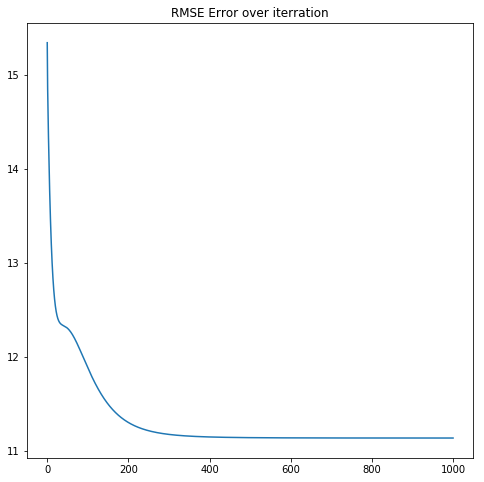

Final_Loss:  11.135218470009905


In [68]:
Model.grad_descent()

In [28]:
Model.calculate_gradient()

(array([ 0.57267625, -1.61993906,  0.76359076,  1.62120176, -1.61887426,
        -0.21081751,  1.55721309,  0.27733679]), 10.798810104607117)

In [29]:
test_data_input = pd.read_csv("01_test.csv")
test_data_norm = normalize(test_data_input)
test_data_input.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,y
0,85588,-1063752,-670427,630693,-949014,1743492,1612197,-2458072,21784,-123504
1,45609,-3626175,-638024,2117203,-3299431,-2099070,4566323,-2458072,24057,-903814
2,101609,243870,-304785,-128466,235720,-2646416,-110933,-2458072,9161,349410
3,87592,-1233948,-350156,730046,-1122275,586017,1628931,-2458072,8565,-117567
4,88061,-114815,-443636,78556,-90402,457760,383479,-2458072,11730,210812


In [0]:
test_feature = np.array(test_data_norm.iloc[:, :-1])
test_label = np.array(test_data_norm.iloc[:, -1])

In [31]:
test_feature

array([[ 0.86260195, -0.66068588, -1.29534324, ...,  1.40281846,
         0.75451152,  0.94754675],
       [-1.14851921, -2.05728843, -1.18195337, ..., -2.10262573,
         2.13465864,  1.37757089],
       [ 1.66852936,  0.05200997, -0.01582908, ..., -2.60195166,
        -0.05052282, -1.44057231],
       ...,
       [-0.49305237, -0.50580195,  0.43569726, ..., -1.68940781,
         0.47011757,  0.72808877],
       [-1.07603052,  0.00347378,  1.03020757, ..., -0.24785375,
        -0.08105295,  0.12249825],
       [ 0.59855395, -0.8572326 ,  0.3634634 , ..., -0.98238869,
         0.8249974 ,  1.52116451]])

In [32]:
Model.test_model(test_feature, test_label)

The RMSE Value in Test set is:  11.208789168164394


11.208789168164394